1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
df_d = pd.read_csv("DataSet/SisFall_dataset/SA01/D01_SA01_R01.txt", sep=",", header=None, names=["ADXL_x", "ADXL_y", "ADXL_z", "gyr_x", "gyr_y", "gyr_z", "MMA8451_x", "MMA8451_y", "MMA8451_z", "time"])
print(df_d)
df_f = pd.read_csv("DataSet/SisFall_dataset/SA01/F01_SA01_R01.txt", sep=",", header=None, names=["ADXL_x", "ADXL_y", "ADXL_z", "gyr_x", "gyr_y", "gyr_z", "MMA8451_x", "MMA8451_y", "MMA8451_z", "time"])
print(df_f)

In [ ]:


# Path to your main dataset folder
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]

# List to store all data (each item is a 2D array from a file)
all_data = []
counter = 0

for subject_id in subject_ids:
    folder_path = os.path.join(base_path, subject_id)

    if not os.path.isdir(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)

            try:
                # Load the first 6 columns of comma-separated file
                df = pd.read_csv(file_path, header=None, delimiter=',', usecols=[0, 1, 2, 3, 4, 5], on_bad_lines='skip')
                # data = np.loadtxt(file_path, delimiter=',', usecols=[0, 1, 2, 3, 4, 5])
                # Convert to NumPy array
                data = df.to_numpy()

                adxl_x = data[:, 0]
                adxl_y = data[:, 1]
                adxl_z = data[:, 2]
                gyr_x = data[:, 3]
                gyr_y = data[:, 4]
                gyr_z = data[:, 5]
                # Create a 2D array with the selected columns
                data = np.column_stack((adxl_x, adxl_y, adxl_z, gyr_x, gyr_y, gyr_z))
                data = data.transpose()  # Transpose the data to get the desired shape
                # Append the 2D array to the list
                all_data.append(data)
                counter += 1

            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                
print(f"Total files processed: {counter}")


In [127]:
len(all_data)


4505

In [128]:
all_data[4504].shape  # Check the shape of the first 2D array

(6, 5000)

In [130]:
all_data[0][0,:]

array([ 17,  15,   1, ..., -15, -18, -26])

In [101]:
a = all_data_combined_array[0,0,:]
a

array([ 17,  15,   1, ..., -15, -18, -26])

In [66]:
print(len(all_data_combined))

2701


In [67]:
# print(f"\n✅ Total records collected: {len(all_data_df)}")
print(f"✅ Read errors: {read_error}")
print(f"✅ File errors: {file_error}")

✅ Read errors: 0
✅ File errors: 301


In [42]:
all_data_df


,0,1,2,3,4,5,label
0,17,-179,-99,-18,-504,-352,D01
1,15,-174,-90,-53,-568,-306,D01
2,1,-176,-81,-84,-613,-271,D01
3,-10,-180,-77,-104,-647,-227,D01
4,-21,-191,-63,-128,-675,-191,D01
...,...,...,...,...,...,...,...
10437810,-14,-213,-143,-5,64,-8,D17
10437811,-13,-210,-145,-7,65,-6,D17
10437812,-13,-216,-143,-9,67,-4,D17
10437813,-14,-213,-141,-9,71,-3,D17


In [44]:
type(selected_data)

dict

In [ ]:
df.describe()

In [ ]:
print(f"Total read errors: {read_error}")
print(f"Total file errors: {file_error}")

In [79]:

subject_id = "D01"
trial_no = "R01"
folder_id = "SA01"
folder = "DataSet/SisFall_dataset/SA01"
# print(f"Reading data from {folder}/{subject_id}_{folder_id}_{trial_no}.txt")

df = pd.read_csv(f"{folder}/{subject_id}_{folder_id}_{trial_no}.txt", sep=",", header=None, names=["ADXL_x", "ADXL_y", "ADXL_z", "gyr_x", "gyr_y", "gyr_z", "MMA8451_x", "MMA8451_y", "MMA8451_z", "time"])
df.head()

,ADXL_x,ADXL_y,ADXL_z,gyr_x,gyr_y,gyr_z,MMA8451_x,MMA8451_y,MMA8451_z,time
0,17,-179,-99,-18,-504,-352,76,-697,-279;,NaN
1,15,-174,-90,-53,-568,-306,48,-675,-254;,NaN
2,1,-176,-81,-84,-613,-271,-2,-668,-221;,NaN
3,-10,-180,-77,-104,-647,-227,-34,-697,-175;,NaN
4,-21,-191,-63,-128,-675,-191,-74,-741,-133;,NaN


In [80]:
subject_id_list = [f"SA{str(i).zfill(2)}" for i in range(1, 24)]
trial_no_list = [f"R{str(i).zfill(2)}" for i in range(1, 11)]
trial_no_list = [f"R{str(i).zfill(2)}" for i in range(1, 11)]

In [81]:
# df_d = pd.read_csv("DataSet/SisFall_dataset/SA01/D01_SA01_R01.txt", sep=",", header=None, names=["ADXL_x", "ADXL_y", "ADXL_z", "gyr_x", "gyr_y", "gyr_z", "MMA8451_x", "MMA8451_y", "MMA8451_z", "time"])
# print(df_d)
# df_f = pd.read_csv("DataSet/SisFall_dataset/SA01/F01_SA01_R01.txt", sep=",", header=None, names=["ADXL_x", "ADXL_y", "ADXL_z", "gyr_x", "gyr_y", "gyr_z", "MMA8451_x", "MMA8451_y", "MMA8451_z", "time"])
# print(df_f)

df_f = pd.read_csv("DataSet/SisFall_dataset/SA01/D01_SA01_R01.txt", sep=",", header=None)
# print(type(df_f))
print(df_f.iloc[:, [0, 1, 2, 3, 4, 5]])
data = df_f.iloc[:, [0, 1, 2, 3, 4, 5]].values
print(type(data))
# print(data)
print(data.shape)
data = data.transpose()
print(data.shape)
print(data[:,0])


        0    1    2    3    4    5
0      17 -179  -99  -18 -504 -352
1      15 -174  -90  -53 -568 -306
2       1 -176  -81  -84 -613 -271
3     -10 -180  -77 -104 -647 -227
4     -21 -191  -63 -128 -675 -191
...    ..  ...  ...  ...  ...  ...
19994   0 -158 -109 -292 -472 -547
19995 -12 -154  -96 -355 -527 -509
19996 -15 -166  -84 -399 -560 -475
19997 -18 -188  -76 -434 -577 -438
19998 -26 -217  -66 -478 -589 -398

[19999 rows x 6 columns]
<class 'numpy.ndarray'>
(19999, 6)
(6, 19999)
[  17 -179  -99  -18 -504 -352]


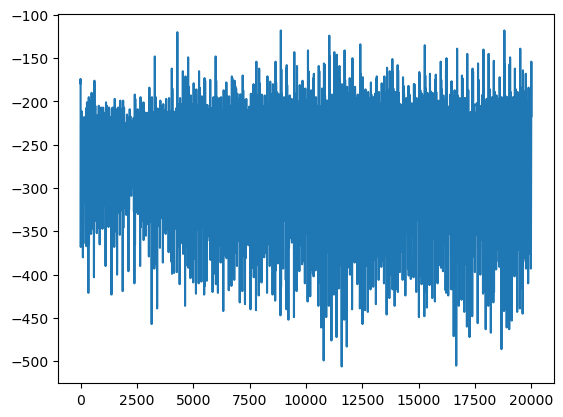

In [82]:
plt.plot(data[1, :], label="ADXL_x")

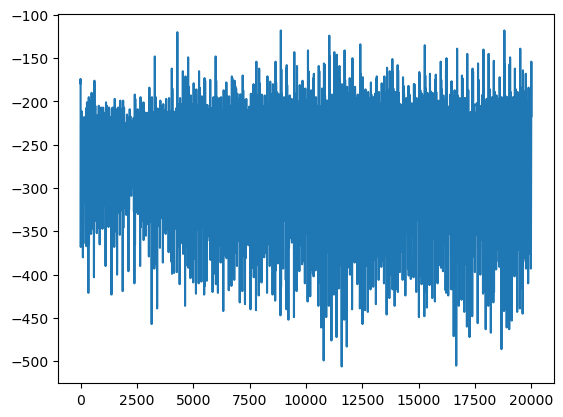

In [83]:
plt.plot(a)

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(df_f["ADXL_x"], label="ADXL_x")
plt.plot(df_f["ADXL_y"], label="ADXL_y")
plt.plot(df_f["ADXL_z"], label="ADXL_z")
plt.title("Accelerometer Data")
plt.xlabel("Sample")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(df_f["gyr_x"], label="gyr_x")
plt.plot(df_f["gyr_y"], label="gyr_y")
plt.plot(df_f["gyr_z"], label="gyr_z")
plt.title("Gyroscope Data")
plt.xlabel("Sample")
plt.ylabel("Angular Velocity (deg/s)")
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(df_f["MMA8451_x"], label="MMA8451_x")
plt.plot(df_f["MMA8451_y"], label="MMA8451_y")  
# plt.plot(df_f["MMA8451_z"], label="MMA8451_z")
plt.title("MMA8451 Data")
plt.xlabel("Sample")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.grid()

plt.show()
